In [1]:
import pandas as pd
df =pd.read_csv('train.csv')
df

,lyric,class
0,Can't drink without thinkin' about you,1
1,Now Lil Pump flyin' private jet (Yuh),0
2,"No, matter fact, you ain't help me when I had ...",0
3,"And you could find me, I ain't hidin'",0
4,From the way you talk to the way you move,1
...,...,...
51049,"I told her pour me some more, then she went ri...",0
51050,Hit the ground and crawl to the dresser,0
51051,Just keep breathin' and breathin' and breathin...,1
51052,"Down go the system, long live the king (King)",0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51054 entries, 0 to 51053
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   lyric   51054 non-null  object
 1   class   51054 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 797.8+ KB


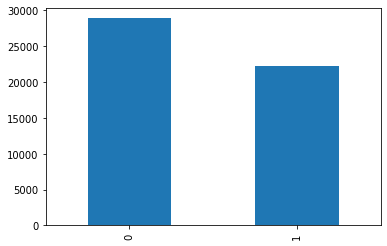

In [10]:
df['class'].value_counts().plot(kind='bar')

In [3]:
#input
x=df.iloc[:,0].values
x

array(["Can't drink without thinkin' about you",
       "Now Lil Pump flyin' private jet (Yuh)",
       "No, matter fact, you ain't help me when I had no money", ...,
       "Just keep breathin' and breathin' and breathin' and breathin'",
       'Down go the system, long live the king (King)',
       'If your mother knew all the things we do (From you, oh)'],
      dtype=object)

In [4]:
#output
y=df.iloc[:,1].values
y

array([1, 0, 0, ..., 1, 0, 1])

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=0)


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer()
x_train_v = vect.fit_transform(x_train)
x_test_v = vect.transform(x_test)

In [7]:
#apply SVC
from sklearn.svm import SVC
model = SVC()

In [8]:
model.fit(x_train_v,y_train)

SVC()

In [9]:
#Pipeline
from sklearn.pipeline import make_pipeline
text_model =make_pipeline(TfidfVectorizer(),SVC())
text_model.fit(x_train,y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()), ('svc', SVC())])

In [12]:
#predict the variable
y_pred =text_model.predict(x_test)

y_pred

array([0, 0, 1, ..., 0, 1, 0])

In [13]:
y_test

array([0, 0, 1, ..., 0, 1, 1])

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)*100

86.96333437793795

In [15]:
c ='Cant drink without thinkin about you	'
c =vect.transform([c])
model.predict(c)

array([1])

In [16]:
import joblib
joblib.dump(text_model,'train')

['train']

In [ ]:
#creating app

In [18]:
!pip install streamlit --quiet

In [19]:
%%writefile app.py 
import streamlit as st
import joblib
model =joblib.load('train')
st.title('PREDICT THE TYPE')
ip=st.text_input('ENTER THE SONG')
op= model.predict([ip])
if st.button('PREDICT'):
 st.title(op[0])

Writing app.py


In [20]:
#temporary deploymrnt
!streamlit run app.py & npx localtunnel --port 8501

2022-07-09 11:16:41.372 INFO    numexpr.utils: NumExpr defaulting to 2 threads.

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://35.185.210.223:8501

npx: installed 22 in 7.005s
your url is: https://thick-socks-greet-35-185-210-223.loca.lt
  Stopping...
^C
